# XGB test


In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [2]:
import pandas as pd

import seaborn as sns

from math import log

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from xgboost import XGBRegressor
import shap


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

from plots2.fns import (
    # standard_layout,
    # corner_annotations_colwise,
    # corner_annotations_rowwise,
    # get_text_annotation,
    get_corner_annotations,
    get_corner_annotations_custom_labels,
    # get_corner_annotations_explicit
)

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE
)

from poly2.utils import trait_vec, gamma_dist, object_dump, object_load
# from poly2.shap import get_shap_values_cumulative
# from poly2.run import no_joblib_single_run, no_joblib_multiple_run
from poly2.config import Config, ConfigMixture, get_asymptote_config
# from poly2.simulator import SimulatorOneTrait, SimulatorAsymptote

C:\Users\user\anaconda3\envs\poly2\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:
from poly2.utils import load_train_test_data, HyperparamsObj
import optuna
from optuna.samplers import TPESampler

# combine hyperparam dfs

In [18]:
def combine_hyperparam_dfs(model):

    df = (
        pd.read_csv(f'../outputs/scores/{model}.csv')
        .join(
            pd.read_csv(f'../outputs/hyperparams/{model}.csv')
        )
        .sort_values('best_cv_score')
    )
    
    df.head(1).to_csv(f'../outputs/hyperparams/best/{model}.csv', index=False)

    return df

In [191]:
model_c = 'all'

In [192]:
df = combine_hyperparam_dfs(model_c)

In [193]:
df.head()

,model,default_cv_score,best_cv_score,rmse_test,rmse_train,rmse_test_def,number,max_depth,n_estimators,learning_rate,subsample,colsample_bytree
99,all,0.131867,0.109074,0.107335,0.042964,0.12707,3,10,1740,0.019909,0.546807,0.887985
46,all,0.131867,0.109675,0.107622,0.048611,0.12707,13,11,1504,0.007188,0.703664,0.897356
92,all,0.131867,0.109896,0.106789,0.033212,0.12707,21,11,1312,0.026453,0.504260,0.942453
195,all,0.131867,0.110027,0.107727,0.046411,0.12707,15,11,770,0.015954,0.737537,0.881221
52,all,0.131867,0.110066,0.108242,0.029186,0.12707,3,10,1347,0.048889,0.684228,0.915346


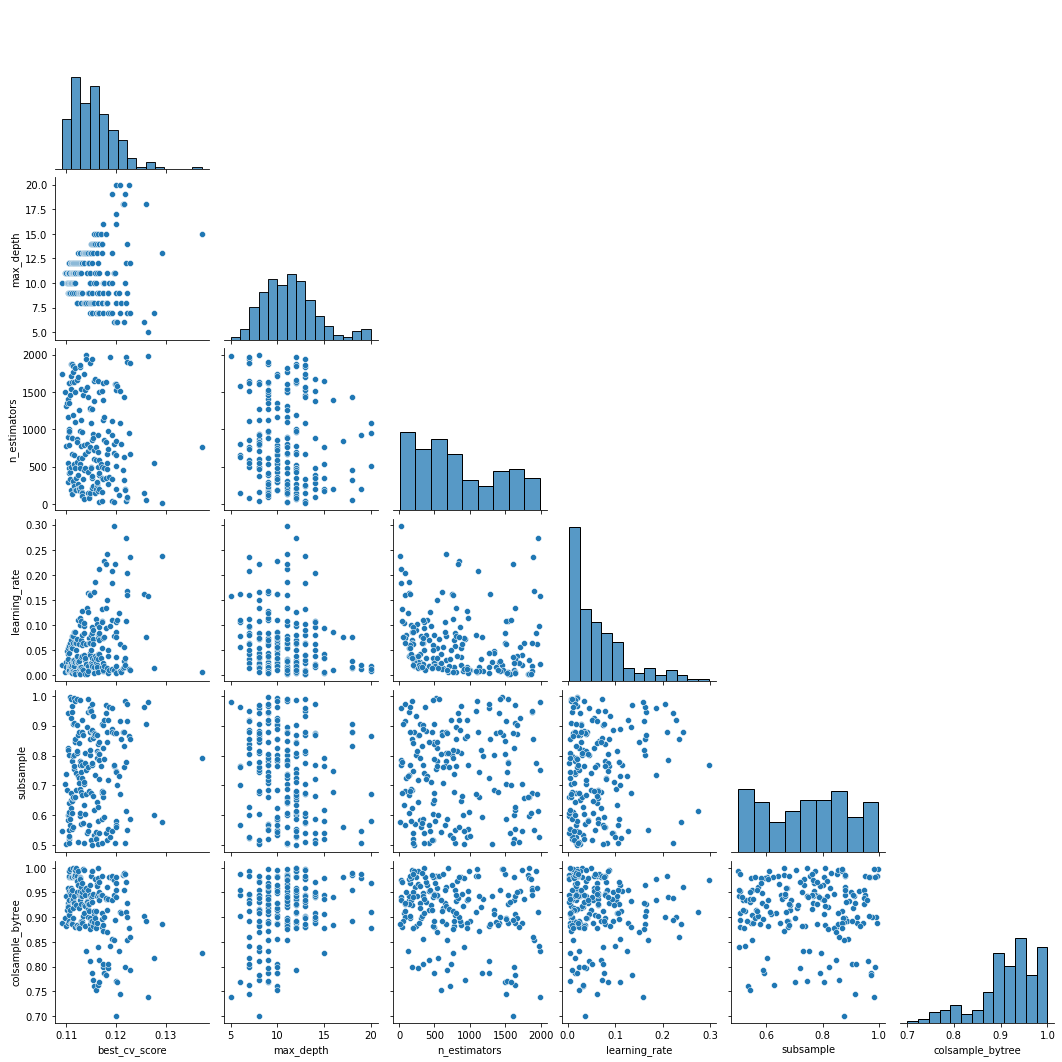

In [194]:
sns.pairplot(
    df.loc[:, [
        'best_cv_score', 
        'max_depth',
        'n_estimators',
        'learning_rate',
        'subsample',
        'colsample_bytree',
    ]],
    corner=True
    # hue='best_cv_score',
    # palette='rocket',
)

# Check for missing indices

In [176]:
model = 'cumulative'

In [178]:
hyper = (
    pd.read_csv(f"../outputs/files/{model}_h.csv")
    .sort_values('value')
)

In [183]:
scores = (
    pd.read_csv(f"../outputs/files/{model}_s.csv")
    .sort_values('value')
)

In [186]:
def get_missing_indices(df):
    out = (
        pd.DataFrame(dict(indices=np.arange(200)))
        .assign(exists = lambda x: x.indices.isin(df.value))
        .loc[lambda x: ~x.exists]
    )
    
    return out

In [187]:
s = get_missing_indices(scores)

In [188]:
h = get_missing_indices(hyper)

In [189]:
todo = pd.concat([s, h]).drop_duplicates()
todo

,indices,exists
66,66,False
137,137,False


In [190]:
todo.to_csv(f'../outputs/todo/{model}.csv', index=False)

## Seeds

In [104]:
seeds = pd.read_csv(f'../outputs/todo/all.csv')
SEED = int(seeds.iloc[0].indices)

In [106]:
seeds

,indices,exists
0,10,False
1,11,False
2,57,False
3,108,False
4,124,False
5,127,False
6,134,False
7,137,False
8,141,False
9,149,False


# older

In [28]:
X_cv, y_cv, X_test, y_test = load_train_test_data('all')

In [45]:
# run_optuna(X_cv, y_cv, 'all')
main('all')

model='all'
load data
check default model


5it [00:28,  5.66s/it]
[I 2022-09-11 20:45:31,249] A new study created in memory with name: no-name-a8cfea67-55d9-49b1-8f8b-c00863ad06bd


optimise hyperparameters
20:45:31: starting


5it [00:13,  2.76s/it]
[I 2022-09-11 20:45:45,095] Trial 0 finished with value: 0.35282812742442526 and parameters: {'max_depth': 16, 'n_estimators': 11, 'learning_rate': 0.03712132853191884, 'subsample': 0.8744019412693059, 'colsample_bytree': 0.6991042073815543}. Best is trial 0 with value: 0.35282812742442526.
5it [00:03,  1.51it/s]
[I 2022-09-11 20:45:48,416] Trial 1 finished with value: 0.22912415762247038 and parameters: {'max_depth': 7, 'n_estimators': 27, 'learning_rate': 0.07654675630645541, 'subsample': 0.5845554182812678, 'colsample_bytree': 0.4530038885044062}. Best is trial 1 with value: 0.22912415762247038.
0it [05:24, ?it/s]


KeyboardInterrupt: 

# old

In [3]:
df = pd.read_csv('../outputs/combined/scan_all.csv')

df.head()

,run,year,best_dose,n_pos_diff,in_0p0_0p1,in_0p1_0p2,in_0p2_0p3,in_0p3_0p4,in_0p4_0p5,in_0p5_0p6,...,in_0p8_0p9,in_0p9_1p0,mu,b,asymptote,dec_rate_multiplier,m_prop_multiplier,m_scale_multiplier,ME_var,ME_mean
0,0,1,1.0,9,1.0,5.054079e-27,7.584700e-34,1.472094e-39,4.846678e-45,9.976588e-51,...,2.492945e-74,3.501367e-90,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,5.044122e-17,0.398241
1,0,2,1.0,9,1.0,5.054079e-27,7.584700e-34,1.472094e-39,4.846678e-45,9.976588e-51,...,2.492945e-74,3.501367e-90,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,5.044122e-17,0.398241
2,0,3,1.0,9,1.0,5.054079e-27,7.584700e-34,1.472094e-39,4.846678e-45,9.976588e-51,...,2.492945e-74,3.501367e-90,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,5.044122e-17,0.398241
3,0,4,1.0,9,1.0,5.054079e-27,7.584700e-34,1.472094e-39,4.846678e-45,9.976588e-51,...,2.492945e-74,3.501367e-90,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,5.044122e-17,0.398241
4,0,5,1.0,9,1.0,5.054079e-27,7.584700e-34,1.472094e-39,4.846678e-45,9.976588e-51,...,2.492945e-74,3.501367e-90,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,5.044122e-17,0.398241


In [14]:
X = (
    # df_filt
    df
    .drop([
        'best_dose',
        'n_pos_diff',
        'ME_var',
        # 'ME_mean',
        # 'yld',
        # 'cum_yld',
    ], axis=1)
    .filter(regex='^((?!in_0).)*$')
    .rename(columns = {
        'dec_rate_multiplier': 'dec_rate',
        'm_prop_multiplier': 'm_prop',
        'm_scale_multiplier': 'm_scale',
        'asymptote': 'asymp',
    })
    
#     .drop('ME_mean', axis=1)
#     .assign(a = lambda x: x.b*x.mu)
#     .assign(nu = lambda x: (x.b)**(x.a) / (1 + x.b)**(x.a))
#     .assign(ME_mean = lambda x: 1 - x.asymp + x.asymp * x.nu)
    
#     .drop(['a', 'nu'], axis=1)
)

# y = df_filt.loc[:, ['run', 'best_dose']]
y = df.loc[:, ['run', 'best_dose']]

X.head()

,run,year,mu,b,asymp,dec_rate,m_prop,m_scale,ME_mean
0,0,1,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.398241
1,0,2,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.398241
2,0,3,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.398241
3,0,4,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.398241
4,0,5,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.398241


In [15]:
# reset index? Might help with Int64Index XGB warning
X_cv = X.loc[lambda x: (x.run<8000)].drop('run', axis=1)
y_cv = y.loc[lambda x: (x.run<8000)].drop('run', axis=1)

X_test = X.loc[lambda x: (x.run>=8000)].drop('run', axis=1)
y_test = np.array(y.loc[lambda x: (x.run>=8000)].drop('run', axis=1))

In [16]:
hyperparams = (
    pd.read_csv('../outputs/best_XGB_hyperparams.csv')
    .iloc[0]
    .to_dict()
)

hyperparams['max_depth'] = int(hyperparams['max_depth'])
hyperparams['n_estimators'] = int(hyperparams['n_estimators'])

hyperparams['objective'] = 'reg:pseudohubererror'

hyperparams

{'max_depth': 10,
 'n_estimators': 853,
 'learning_rate': 0.0182387397607204,
 'subsample': 0.721624617726085,
 'colsample_bytree': 0.943486029986996,
 'objective': 'reg:pseudohubererror'}

In [17]:
%%time

rmse_list = []
        
kf = KFold(n_splits=10)

for train_ind, val_ind in tqdm(kf.split(X_cv)):

    X_tr = X_cv.iloc[train_ind]
    y_tr = y_cv.iloc[train_ind]

    X_v = X_cv.iloc[val_ind]
    y_v = y_cv.iloc[val_ind]
    
    train_runs = X.iloc[train_ind].run
    val_runs = X.iloc[val_ind].run

    print(f'ok? {sum(train_runs.isin(val_runs))==0}')

    y_tr = np.array(y_tr)
    y_v = np.array(y_v)

    model = XGBRegressor(
        **hyperparams,
    ).fit(X_tr, y_tr)

    y_p = model.predict(X_v)

    rmse = mean_squared_error(y_p, y_v, squared=False)

    rmse_list.append(rmse)

score = sum(rmse_list)/len(rmse_list)

score

ok? True


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


ok? True


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


ok? True


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


ok? True


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


ok? True


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


ok? True


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


ok? True


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


ok? True


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


ok? True


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


ok? True


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Wall time: 16min 6s


0.10888194232377864

Aiming to beat `0.110` (squared error, keep non-exact `ME_mean`)

- `0.1138`: using `reg:pseudohubererror` and dropping `ME_mean`.
- `0.1089`: using `reg:pseudohubererror` and keeping `ME_mean`.
- `XX`: using `reg:squarederror` and dropping `ME_mean`.
- `XX`: using `reg:squarederror` and using exact `ME_mean`.

<AxesSubplot:>

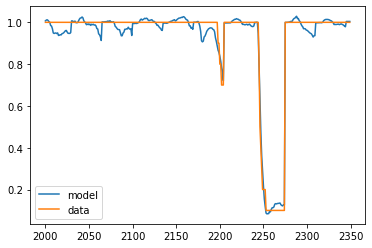

In [30]:
start = 2000
show = 350

(
    pd.DataFrame(dict(model=y_p, data=y_v[:, 0]))
    # .head(1000)
    .iloc[start:start+show]
    .plot()
)

In [157]:
%%time

best_model = XGBRegressor(**hyperparams).fit(X_cv, y_cv)

y_p = best_model.predict(X_test)

rmse = mean_squared_error(y_p, y_test, squared=False)

rmse

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Wall time: 1min 30s


0.050031964040011964

In [144]:
best_model.save_model('xgb_scan_all_no_ME_mean.json')

Shap vals took around `43.2s`

In [145]:
# %%time

# X_use = X_cv.head(1002)

# shap_values = get_shap_values_cumulative(X_use)

________________________________________________________________________________
[Memory] Calling poly2.shap.get_shap_values_cumulative...
get_shap_values_cumulative(      year         mu         b     asymp  dec_rate    m_prop   m_scale  \
0      1.0  17.879734  2.744068  0.602763  1.786355  0.703574  1.957890   
1      2.0  17.879734  2.744068  0.602763  1.786355  0.703574  1.957890   
2      3.0  17.879734  2.744068  0.602763  1.786355  0.703574  1.957890   
3      4.0  17.879734  2.744068  0.602763  1.786355  0.703574  1.957890   
4      5.0  17.879734  2.744068  0.602763  1.786355  0.703574  1.957890   
...    ...        ...       ...       ...       ...       ...       ...   
997   18.0   4.290742  3.649953  0.521037  0.478235  0.251185  0.108904   
998   19.0   4.290742  3.649953  0.521037  0.478235  0.251185  0.108904   
999   20.0   4.290742  3.649953  0.521037  0.478235  0.251185  0.108904   
1000  21.0   4.290742  3.649953  0.521037  0.478235  0.251185  0.108904   
1001  22.

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


done
______________________________________get_shap_values_cumulative - 42.8s, 0.7min
Wall time: 42.9 s


In [146]:
fn = './shap_values_cumulative.pickle'

if True:
    object_dump(shap_values, fn)
else:
    shap_values = object_load(fn)

# Fig

In [147]:
WIDTH = 8
HEIGHT = 4

## A

Text(0.05, 0.9, 'A')

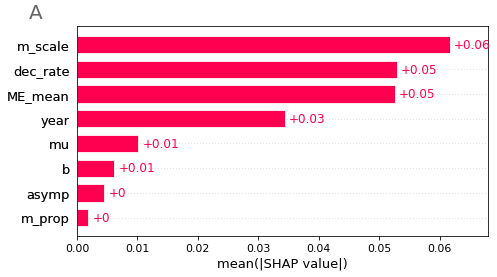

In [148]:
plt.close('all')

shap.plots.bar(shap_values, show=False)

f = plt.gcf()

ax = plt.gca()

f.set_figwidth(WIDTH)
f.set_figheight(HEIGHT)

f.patch.set_facecolor('white')


labels=[
    r'$M_s$',
    r'$M_d$',
    r'$\nu$',
    r'$Y$',
    r'$\mu$',
    r'$b$',
    r'$\omega$',
    r'$M_p$',
]*2

# ax.set_yticklabels(labels)


ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# ax.set_xlim([0, 0.15])

f.tight_layout(rect=[0.028, 0, 0.9, 0.92])

plt.annotate(
    'A',
    (0.05, 0.9),
    xycoords='figure fraction',
    color=(0.4, 0.4, 0.4),
    size=20,
)

# f

In [149]:
f.savefig('../figures/to_combine/appc_fig5_1.jpg', dpi=300)

## B

Text(0.05, 0.9, 'B')

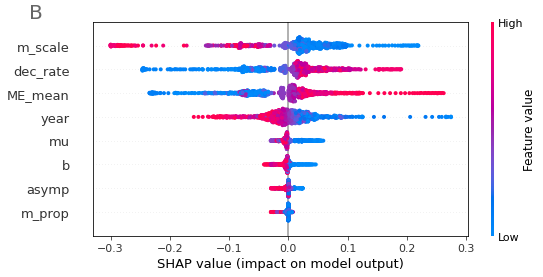

In [150]:
plt.close('all')

shap.plots.beeswarm(shap_values, plot_size=(WIDTH,HEIGHT), show=False)

f = plt.gcf()

ax = plt.gca()

f.patch.set_facecolor('white')


ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

labels=[
    r'$M_p$',
    r'$\omega$',
    r'$b$',
    r'$\mu$',
    r'$Y$',
    r'$\nu$',
    r'$M_d$',
    r'$M_s$',
]

# ax.set_yticklabels(labels)

f.tight_layout(rect=[0, 0, 1, 0.95])

plt.annotate(
    'B',
    (0.05, 0.9),
    xycoords='figure fraction',
    color=(0.4, 0.4, 0.4),
    size=20,
)

In [151]:
f.savefig('../figures/to_combine/appc_fig5_2.jpg', dpi=300) # , bbox_inches="tight"

Run this in `cmd`:
```
cd Documents\Python\PhD\poly2\polygenic2\figures\to_combine
magick montage appc_fig5_[1-2].jpg -tile x2 -geometry 1000x450+2+20 appc_fig3.jpg
```